### All Problems are done in a single script

In [19]:
import numpy as np
from matplotlib import pyplot as plt 
class Nbody:
    def __init__(self,ms=0,x=0,y=0,n=1):
        self.x = x   # array of x positions
        self.y = y   # array of y positions
        self.dict = {'pnu':n,'G':1}
        self.ms = np.ones(self.dict['pnu'])# array of masses
    def set_pos(self):
        self.x = np.random.randn(self.dict['pnu'])
        self.y = np.random.randn(self.dict['pnu'])
    def get_potential(self):
        potential = np.zeros(self.dict['pnu'])
        for i in range( self.dict['pnu']):
            r = np.sqrt((self.x[i]-self.x)**2+(self.y[i]-self.y)**2)
            r[i] = 0
            potential = (self.dict['G']*self.ms[i]*self.ms)/r
        return self.m + np.sum(potential)
    def get_force(self,soft=.1):
        soft_pot  =0 
        
        self.fx = np.zeros(self.dict['pnu'])
        self.fy  =np.zeros(self.dict['pnu'])
        for i in range(self.dict['pnu']-1):
            r2 =  (self.x[i]-self.x[i+1:])**2 + (self.y[i]-self.y[i+1:])**2
            r2[r2<soft]=soft
            r3 = r2 * np.sqrt(r2)
            r = np.sqrt(r2)
            self.fx[i]-=np.sum(self.x[i]-self.x[i+1:]*(1/r3)*self.ms[i+1:])
            self.fy[i]-=np.sum(self.y[i]-self.y[i+1:]*(1/r3)*self.ms[i+1:])
            self.fx[i+1:]+=self.x[i]-self.x[i+1:]*(1/r3)*self.ms[i]
            self.fy[i+1:]+=self.y[i]-self.y[i+1:]*(1/r3)*self.ms[i]
            soft_pot+=np.sum(self.dict['G']*self.ms[i]*self.ms[i+1:]*1.0/r)
        return soft_pot
    def update_pos(self,dt=0.1,):
        self.fx = np.zeros(self.dict['pnu'])
        self.fy  =np.zeros(self.dict['pnu'])
        self.vx = np.zeros(self.dict['pnu'])
        self.vy = np.zeros(self.dict['pnu'])
        self.x+=self.vx*dt
        self.y+=self.vy*dt
        self.vx+=self.fx*dt
        self.vy+=self.fy*dt
        return self.get_force() + 0.5*np.sum(self.ms*(self.vx**2+self.vy**2))


initial energy:  927244.4045385158


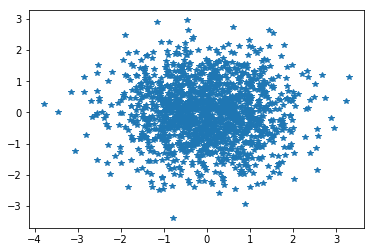

In [20]:
part=Nbody(ms=1.0,x=0,y=0,n=1500)
part.set_pos()
energy=part.update_pos()

print('initial energy: ',energy)
plt.plot(part.x,part.y,'*')
plt.show()
energy=part.update_pos()
